## Process 와 thread의 차이 공부 
- process란 실행하고 있는 컴퓨터의 프로그램을 의미한다
- 스레드란 process의 단위라고 생각하면 된다. 
1. Thread 
스레드는 단일 cpu에서 돌아갈 수 있다. 스레드는 resource를 공유하는데 heap, code, data를 공유하고 있다.
스레드는 os를 사용한 전환이 필요하지 않다. concurrency의 특징을 가지는데 이는 동시성이란 표현으로 같은 cpu를 공유하면서 스레드를 실행한다고 한다. 
2. Process 
프로세스는 multiprocess 시 paraellism을 가지게된다. process간의 전환 시 os의 context switching이 사용된다. 단일 cpu에서는 multi process가 안된다고 한다. 
- GIL 
파이썬은 인터프리터이기 때문에 편리함을 고수하고자 다중 쓰레드의 구현이 실제로 안된다고 한다. 즉, 아무리 다중 스레드로 구현해도 단일 스레드로 진행된다고 한다. 

In [1]:
import threading
import time
import os

def hello(s):
  print('Function is starting! ', s, 'pid:', os.getpid(), 'thread id:', threading.get_ident())
  time.sleep(1)

t1 = threading.Thread(target=hello, args=['test'])
t2 = threading.Thread(target=hello, args=['user'])
t1.start()
t2.start()
t1.join()
t2.join()


Function is starting!  test pid: 20344 thread id: 11592
Function is starting!  user pid: 20344 thread id: 18100


In [3]:
import multiprocessing
import time
import os

def hello(s):
  print('Function is starting! ', s, 'pid:', os.getpid(), 'thread id:', threading.get_ident())
  time.sleep(1)

p1 = multiprocessing.Process(target=hello, args=['test'])
p2 = multiprocessing.Process(target=hello, args=['user'])
p1.start()
p2.start()
p1.join()
p2.join()

## Below code is the example of thread pool from A.I holic youtube. 
This code shows us the difference of parallelism and concurrency. (== which is multi-thread vs multi-process)
By ploting the result, we can see that multi-threading is actually sharing one cpu. Thus in multi-processing, each of process is actually using cpu full-time

multithreading started workers: 4
Functions start!  0 pid: 118 thread id: 140100374349568
Functions start!  1 pid: 118 thread id: 140100382742272
Functions start!  2 pid: 118 thread id: 140100336588544
Functions start!  3 pid: 118 thread id: 140100365956864
multiprocessing started workers: 4
Functions start!  0 pid: 199 thread id: 140100992149376
Functions start!  2 pid: 201 thread id: 140100992149376
Functions start!  1 pid: 200 thread id: 140100992149376
Functions start!  3 pid: 202 thread id: 140100992149376


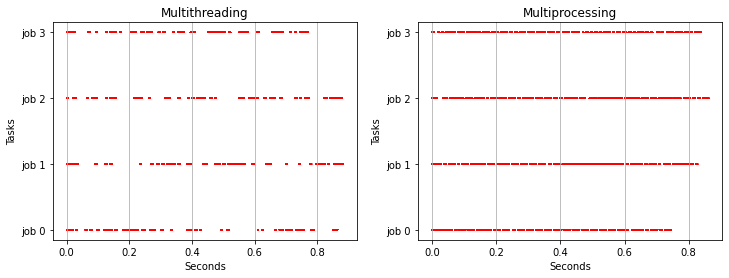

In [ ]:
import os
import time
import threading
from concurrent.futures import ProcessPoolExecutor, ThreadPoolExecutor

import matplotlib.pyplot as plt
import numpy as np

printlock = threading.Lock()

def multithreading(func, args, workers):
    print("multithreading started workers:", workers)
    with ThreadPoolExecutor(workers) as ex:
        res = ex.map(func, args)
    return list(res)


def multiprocessing(func, args, workers):
    print("multiprocessing started workers:", workers)
    with ProcessPoolExecutor(workers) as ex:
        res = ex.map(func, args)
    return list(res)


def live_tracker(x):
    with printlock:
      print('Functions start! ', x, "pid:", os.getpid(), "thread id:", threading.get_ident())
    reference = time.time()
    l = []
    for i in range(10**6):
        l.append(time.time() - reference)
    return l


def visualize_live_runtimes(results, title):
    for i, exp in enumerate(results):
        plt.scatter(exp, np.ones(len(exp)) * i, alpha=0.8, c='red', edgecolors='none', s=1)

    plt.grid(axis='x')
    plt.ylabel("Tasks")
    ytks = range(len(results))
    plt.yticks(ytks, ['job {}'.format(exp) for exp in ytks])
    plt.xlabel("Seconds")
    plt.title(title)


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
visualize_live_runtimes(multithreading(live_tracker, range(4), 4), "Multithreading")
plt.subplot(1, 2, 2)
visualize_live_runtimes(multiprocessing(live_tracker, range(4), 4), "Multiprocessing")
plt.show()

In [ ]:
import multiprocessing
multiprocessing.cpu_count()

2